# **Credit Score Classification Model Development**






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the file to Python Environment**

In [2]:
#read the csv file
data = pd.read_csv('/content/credit.csv')

In [ ]:
#display first five rows.
pd.set_option('display.max_columns', None) #to view all the columns of the dataset
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [6]:
#Display information related to the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

**1.The dataset comprises of float,integer and string values.**



In [ ]:
#check for any null values
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**There are no missing/null values in the dataset**

In [ ]:
# dimension of data
data.shape

(100000, 28)

In [ ]:
#Describe the data
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
#checking if there are any rows duplicated
data[data.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


**There are no duplicate rows in the dataset.**

In [ ]:
#separate categorial and numerical variables for easy analysis
cat_col = data.select_dtypes(include =["object"]).columns
print(cat_col)
print("number of Categorical:",len(cat_col))

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')
number of Categorical: 7


In [ ]:
#NUmberical variables
num_col = data.select_dtypes(exclude =["object"]).columns
print(num_col)
print("number of Numerical:",len(num_col))

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')
number of Numerical: 21


In [ ]:
#unique values in each column
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [ ]:
#checking the number of values for each Credit score
data.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

**EXPLORATORY DATA ANALYSIS**

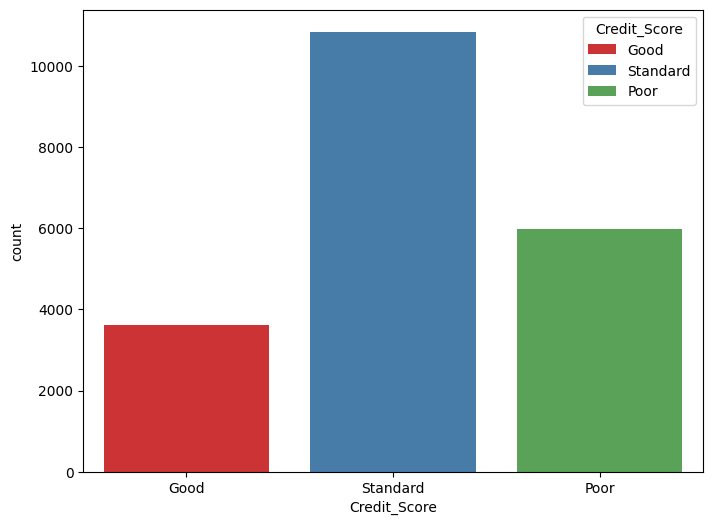

In [ ]:
#distribution of all credit score
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_Score', data=data,palette='Set1',hue='Credit_Score')
plt.show()

**There's an imbalance between the count of each class.**

Standard is the most frequent class.

Good is the least frequent class.

There's a big difference between the  classes, which should to be taken into account when building a model.

**COUNTPLOT TO SHOW PAYMENT BEHAVIOUR**

In [ ]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

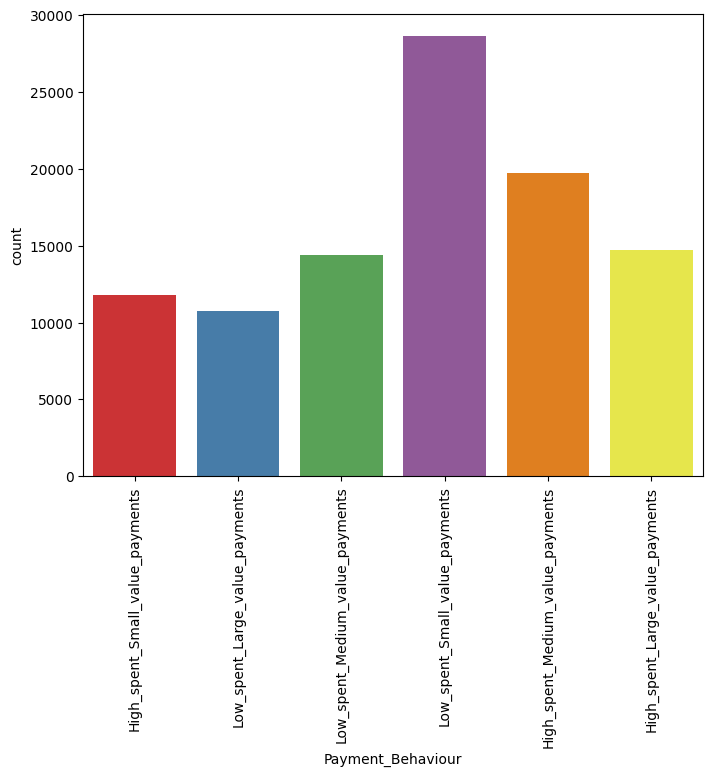

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Payment_Behaviour', data=data,palette='Set1',hue='Payment_Behaviour')
plt.xticks(rotation=90)
plt.show()

**Feature Engineering : Create a new column Spending_level and Payment _value from the column Payment Behaviour**

In [3]:
# Create a new column based on the first word
data['Spending_level'] = data['Payment_Behaviour'].str.split('_').str[0]

# Map the values to 'High' or 'Low'
data['Spending_level'] = data['Spending_level'].map({'High': 'High', 'Low': 'Low'})

In [4]:
data['Payment_value'] = data['Payment_Behaviour'].str.split('_').str[2]

# Map the values to 'High' or 'Low'
data['Payment_value'] = data['Payment_value'].map({'Small': 'Low', 'Large': 'High','Medium':'Medium'})

**Percentage of distribution between High and Low Spending Level**

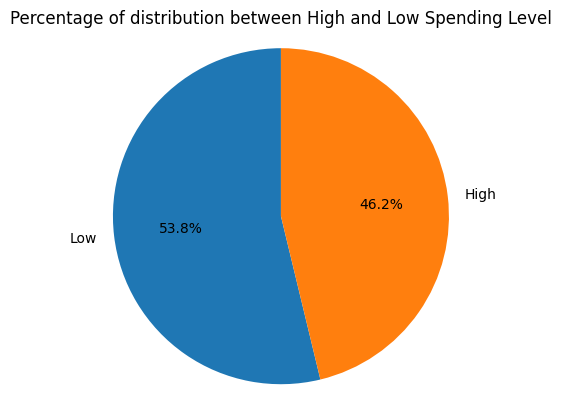

In [23]:
# Count the occurrences of the two types of Spending Level
category_counts = data['Spending_level'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')
# Add a title
plt.title('Percentage of distribution between High and Low Spending Level')
# Display the plot
plt.show()

**Feature Engineering : Split the Type of column into the different types of loan and place 1 or 0 based as values**

In [5]:
# Remove the word 'and' from the specified column
data['Type_of_Loan'] = data['Type_of_Loan'].str.replace(' and', '')

# Clean up values by stripping leading and trailing whitespaces
data['Type_of_Loan'] = data['Type_of_Loan'].apply(lambda x: x.strip())

# Split the values into separate columns
data_split = data['Type_of_Loan'].str.get_dummies(', ')
data = pd.concat([data, data_split], axis=1)

In [25]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Data,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,0,1,0,0,0,0,1,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,0,1,0,0,0,0,1,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,0,1,0,0,0,0,1,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,0,1,0,0,0,0,1,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,0,1,0,0,0,0,1,0


In [26]:
# Count the number of unique customers who took each type of loan
auto_loan_counts = data.groupby('Auto Loan')['Customer_ID'].nunique()
credit_builder_counts = data.groupby('Credit-Builder Loan')['Customer_ID'].nunique()
debt_consolidation_counts = data.groupby('Debt Consolidation Loan')['Customer_ID'].nunique()
home_equity_loan_counts = data.groupby('Home Equity Loan')['Customer_ID'].nunique()
mortgage_loan_counts = data.groupby('Mortgage Loan')['Customer_ID'].nunique()
payday_loan_counts = data.groupby('Payday Loan')['Customer_ID'].nunique()
student_loan_counts = data.groupby('Student Loan')['Customer_ID'].nunique()

In [27]:
auto_loan_counts

Auto Loan
0    8680
1    3820
Name: Customer_ID, dtype: int64

In [28]:
credit_builder_counts

Credit-Builder Loan
0    8534
1    3966
Name: Customer_ID, dtype: int64

In [29]:
debt_consolidation_counts

Debt Consolidation Loan
0    8620
1    3880
Name: Customer_ID, dtype: int64

In [30]:
home_equity_loan_counts

Home Equity Loan
0    8575
1    3925
Name: Customer_ID, dtype: int64

In [31]:
mortgage_loan_counts

Mortgage Loan
0    8580
1    3920
Name: Customer_ID, dtype: int64

In [32]:
payday_loan_counts

Payday Loan
0    8507
1    3993
Name: Customer_ID, dtype: int64

In [33]:
student_loan_counts

Student Loan
0    8620
1    3880
Name: Customer_ID, dtype: int64


**EDA to show relation between Occupation and Spending Level**

<Figure size 1200x800 with 0 Axes>

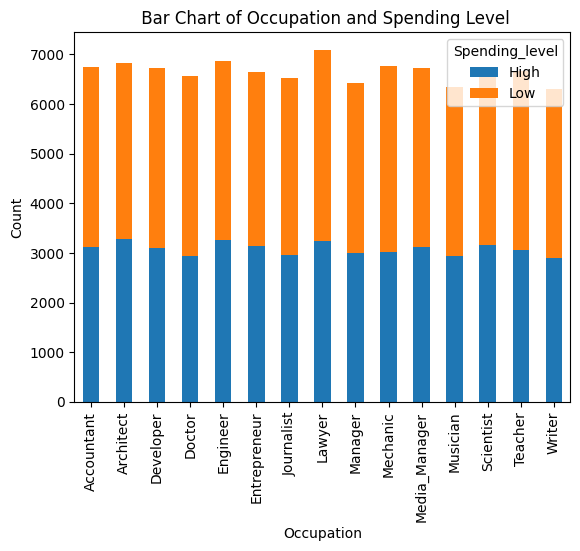

In [ ]:
# Create a contingency table without total
contingency_table = pd.crosstab(data['Occupation'], data['Spending_level'])
# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
contingency_table.plot(kind='bar', stacked=True)
plt.title(' Bar Chart of Occupation and Spending Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [ ]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

<ipython-input-21-c3276e3c9a9f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest" )


Text(0.5, 1.0, 'Correlation Heatmap')

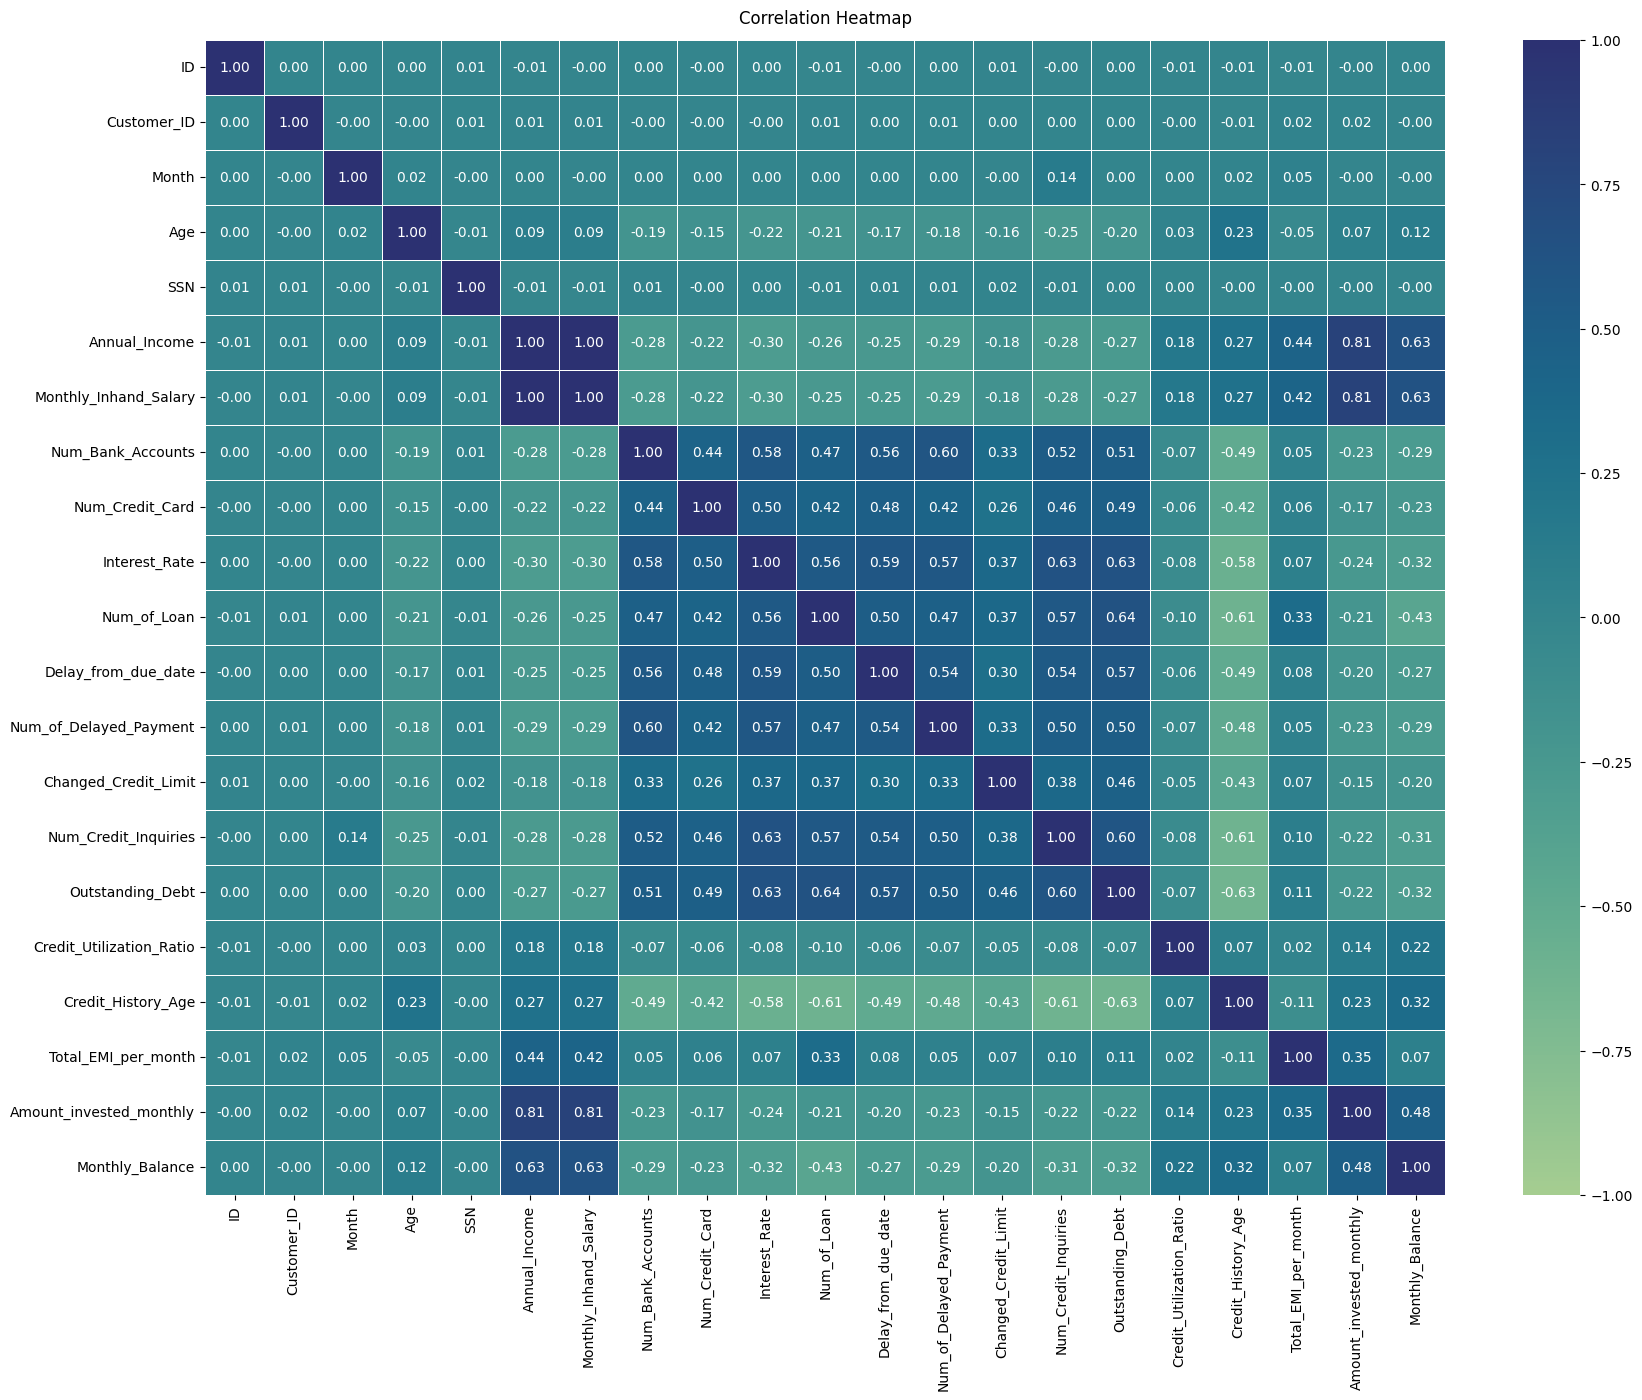

In [ ]:
#Co-relation matrix
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest" )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
#the below function will select highly correlated features
#it will show the first feature that is corelated with any other feature
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j]>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(data,0.90)
len(set(corr_features))
corr_features

<ipython-input-30-bc1fe48e7fe6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{'Monthly_Inhand_Salary'}

**Relation between Occupation and Payment Behaviour**

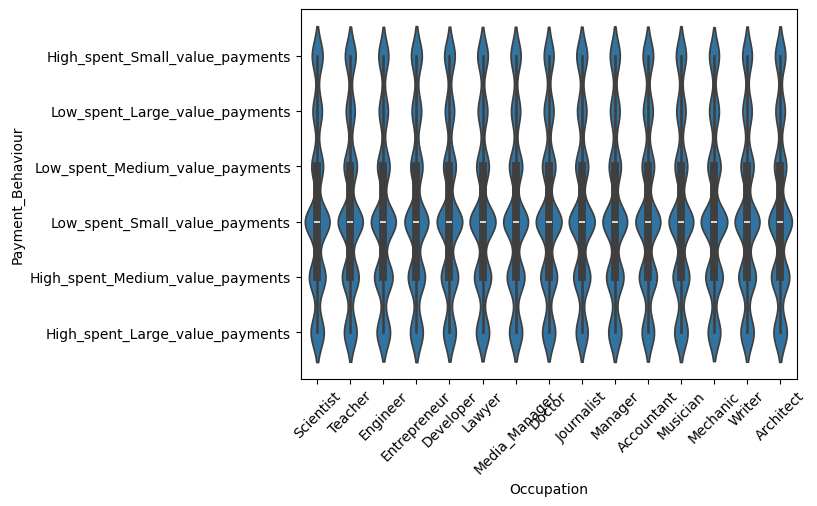

In [ ]:
# Create violin plot
sns.violinplot(x='Occupation', y='Payment_Behaviour', data=data)
plt.xticks(rotation=45)
# Show the plot
plt.show()

Skew: 0.0


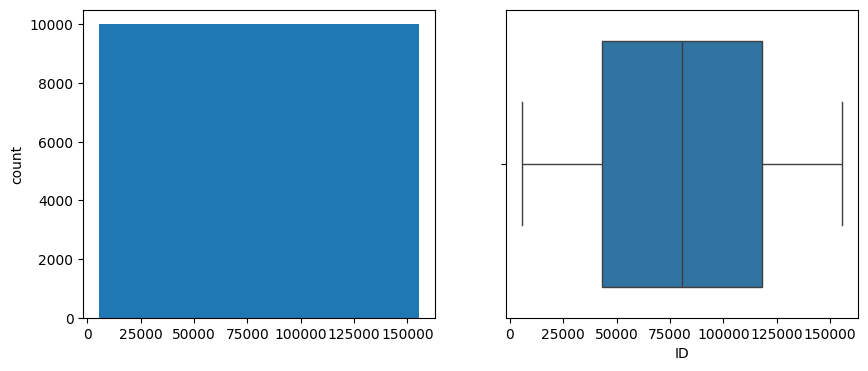

Skew: 0.01


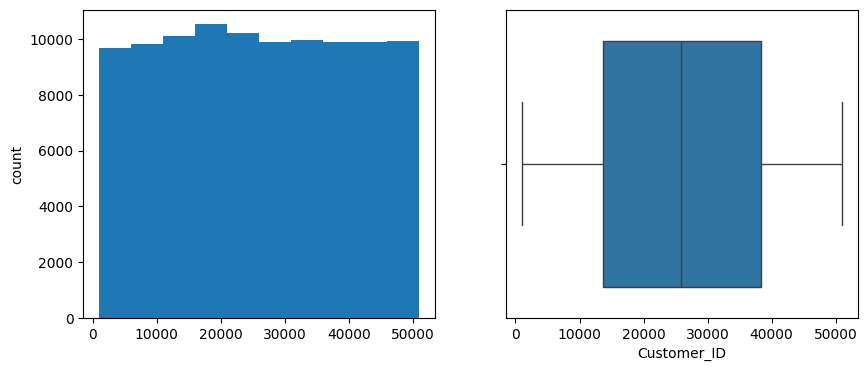

Skew: 0.0


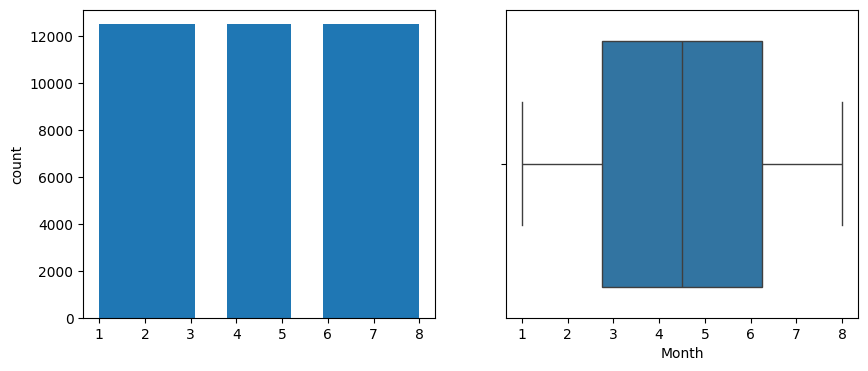

Skew: 0.16


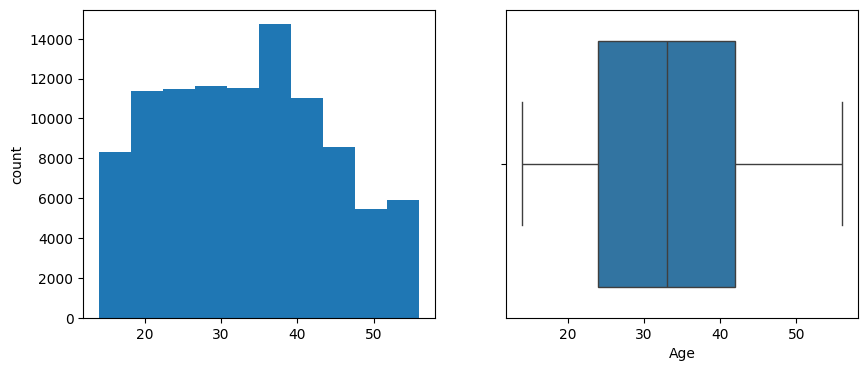

Skew: -0.0


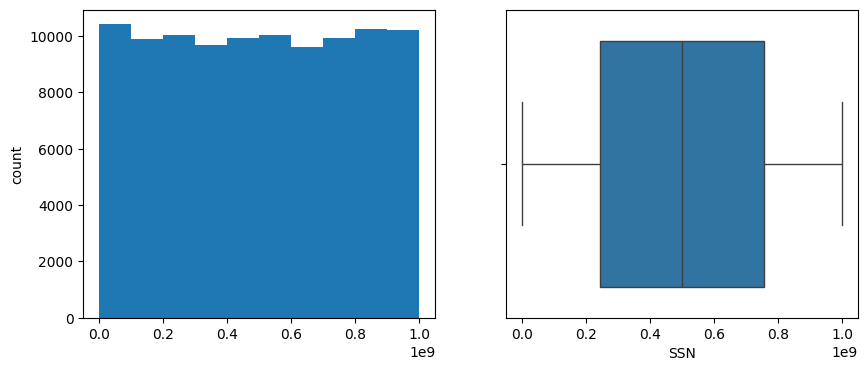

Skew: 1.13


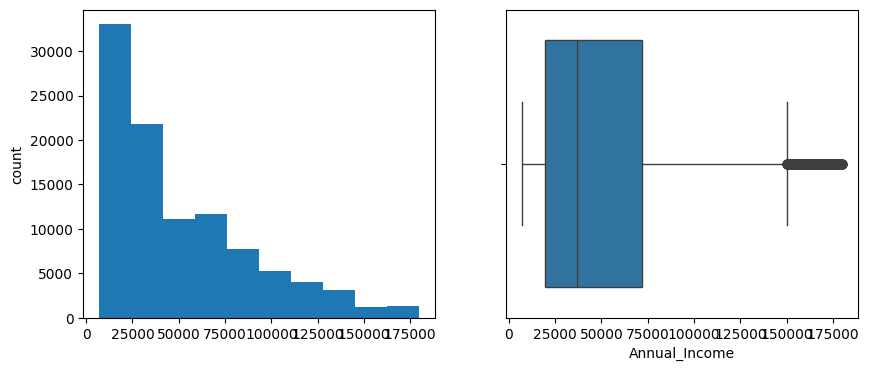

Skew: 1.13


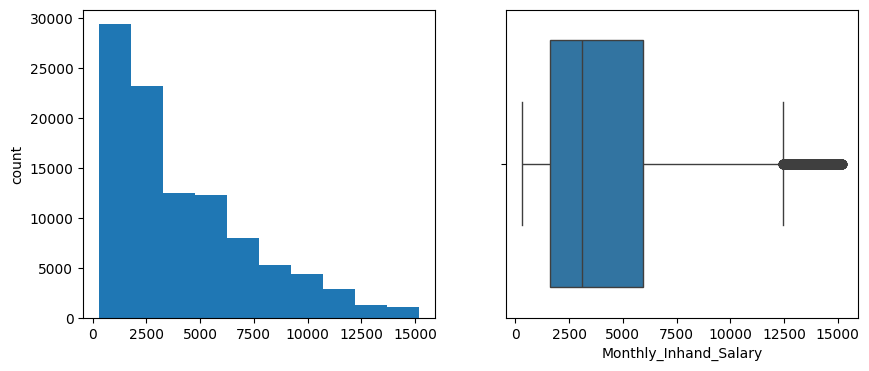

Skew: -0.19


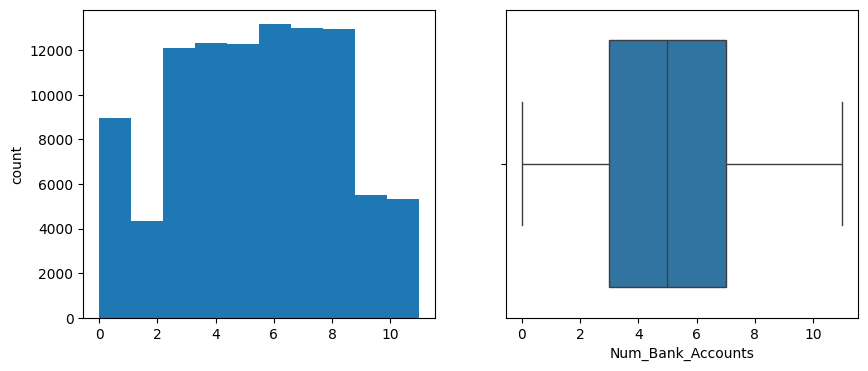

Skew: 0.23


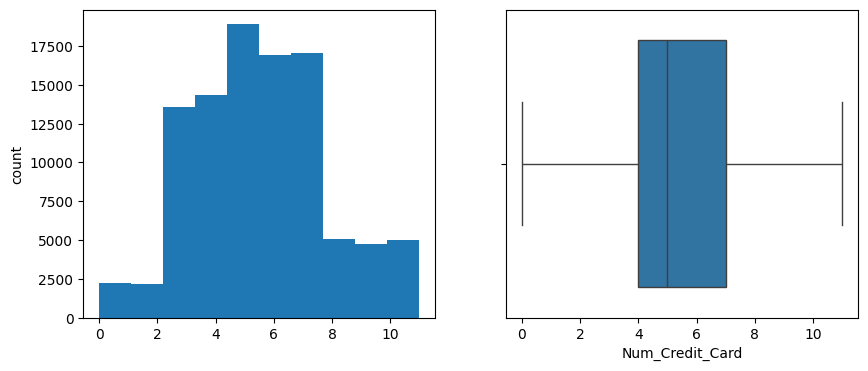

Skew: 0.5


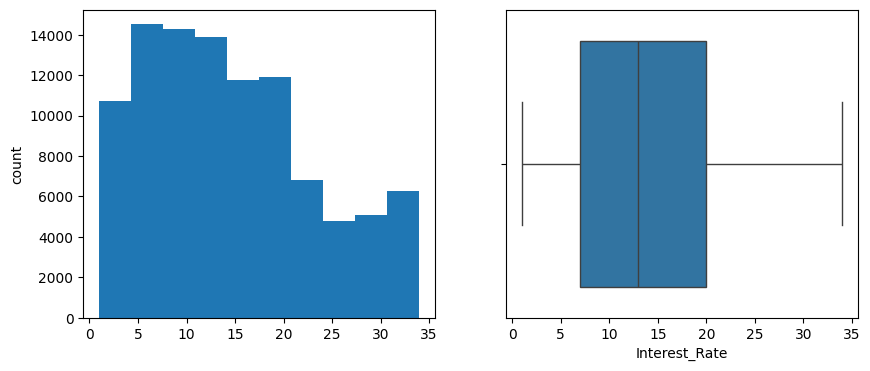

Skew: 0.45


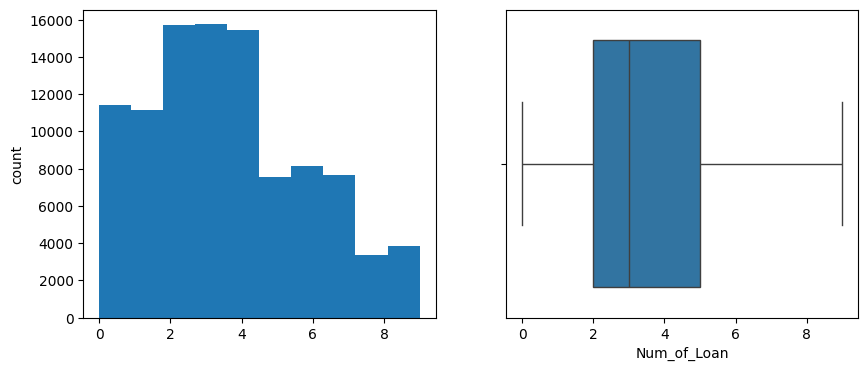

Skew: 0.97


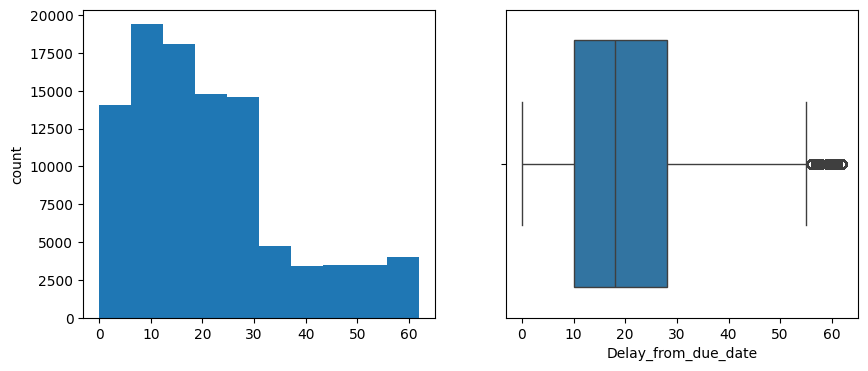

Skew: -0.21


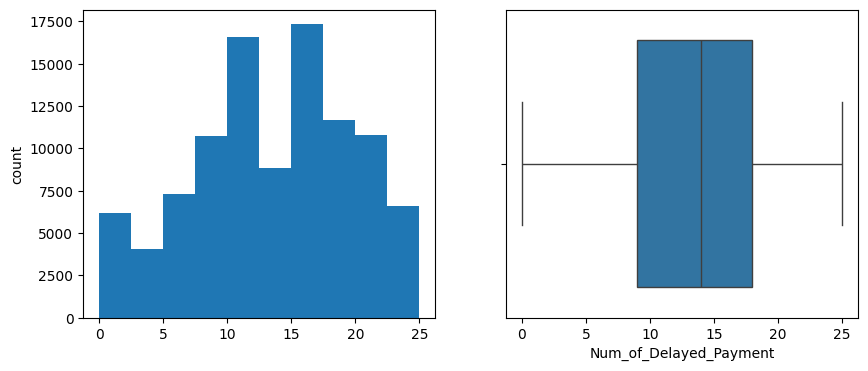

Skew: 0.71


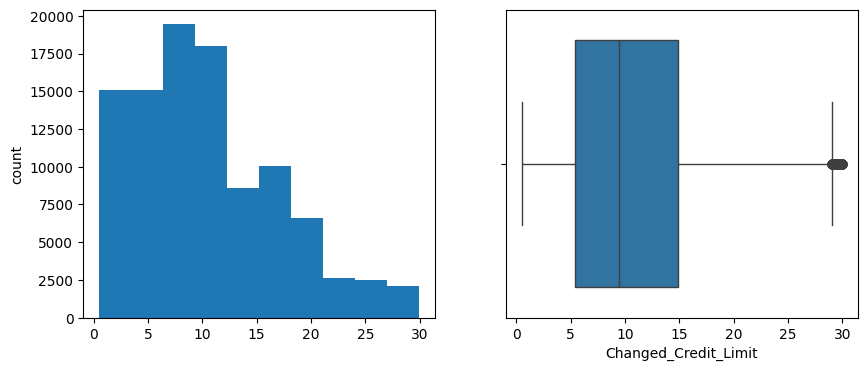

Skew: 0.41


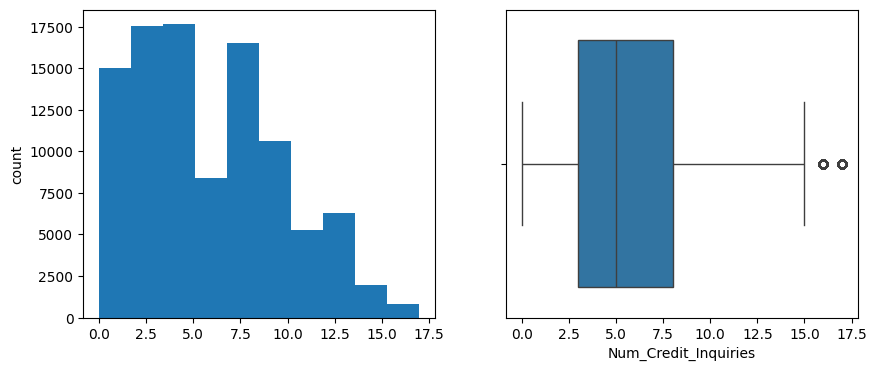

Skew: 1.21


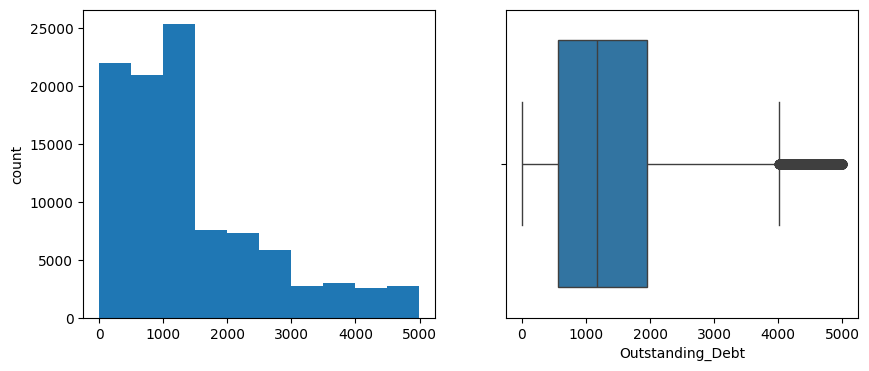

Skew: 0.03


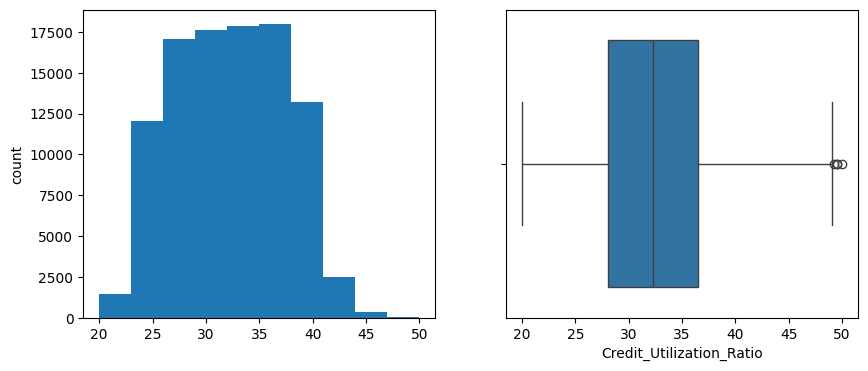

Skew: -0.05


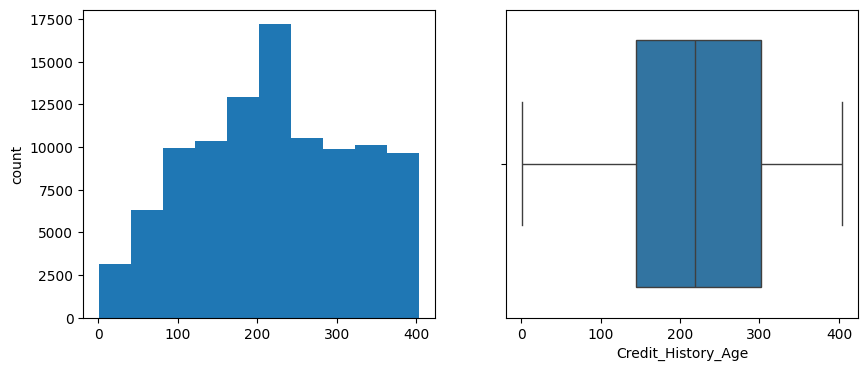

Skew: 4.04


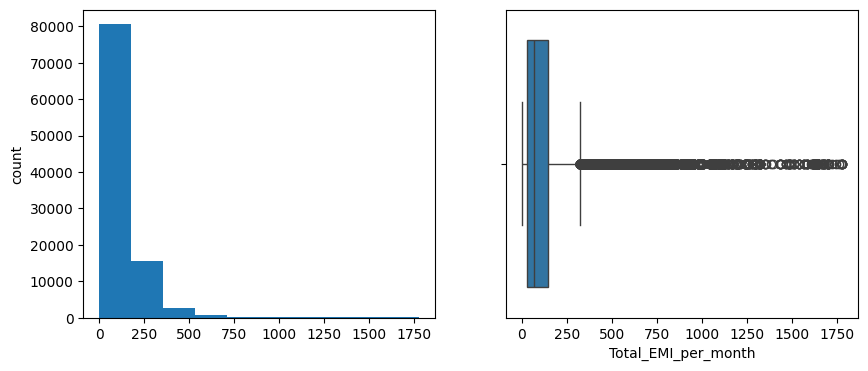

Skew: 1.76


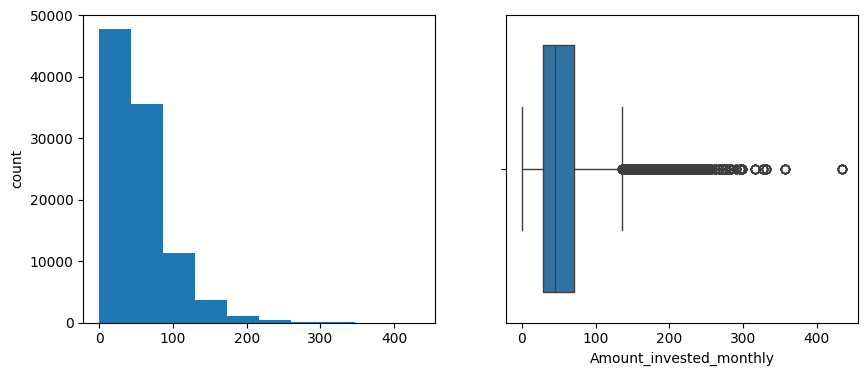

Skew: 1.36


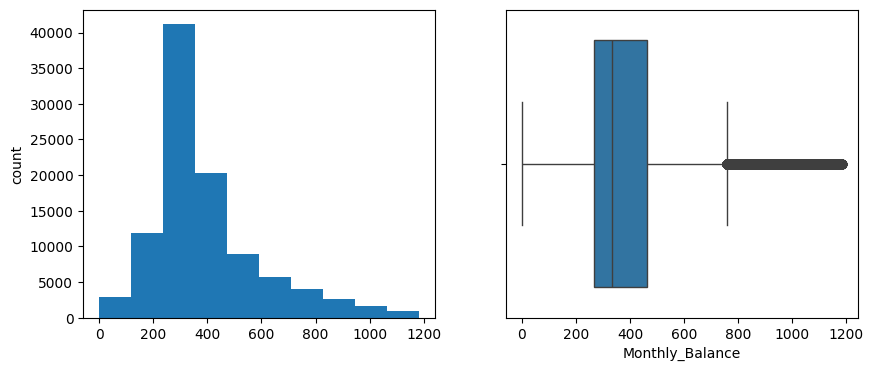

In [ ]:
for col in num_col:
  print('Skew:',round(data[col].skew(),2))
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  #sns.histplot(data[col])
  data[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

**Removing Outlier from the column Credit Utilization columns**

In [6]:
#outliers for Credit Utilization columns
q1 = np.percentile(data['Credit_Utilization_Ratio'],25,method="midpoint")
q2 = np.percentile(data['Credit_Utilization_Ratio'],50,method="midpoint")
q3 = np.percentile(data['Credit_Utilization_Ratio'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Credit_Utilization_Ratio']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in Credit_Utilization_Ratio column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in Credit_Utilization_Ratio column: 4
[50.00000000000001, 49.52232429787243, 49.25498297529708, 49.56451934738699]
49.162935902000264


In [7]:
ind2 = data['Credit_Utilization_Ratio'] > up_lim_p
data.loc[ind2].index

Int64Index([9382, 17029, 62954, 68000], dtype='int64')

In [8]:
data.drop([9382, 17029, 62954, 68000],inplace=True)

**Mapping the values to numerical values**

In [9]:
# Define a mapping dictionary and encode Payment Behaviour based on the six types
Payment_Behaviour = {'High_spent_Small_value_payments': 0, 'Low_spent_Large_value_payments': 1, 'Low_spent_Medium_value_payments': 2, 'Low_spent_Small_value_payments': 3, 'High_spent_Medium_value_payments': 4, 'High_spent_Large_value_payments': 5}
data['Payment_Behaviour'] = data['Payment_Behaviour'].map(Payment_Behaviour)

In [10]:
# Define a mapping dictionary and encode Payment of Minimum amount based on the three types
Payment_of_Min_Amount = {'No': 0, 'Yes': 1, 'NM': 2}
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map(Payment_of_Min_Amount)

In [11]:
# Define a mapping dictionary and encode Credit score amount based on the three types
Credit_Score = {'Good': 0, 'Poor': 1, 'Standard': 2}
data['Credit_Score'] = data['Credit_Score'].map(Credit_Score)

In [12]:
# Define a mapping dictionary and encode Credit Mix amount based on the three types
Credit_Mix = {'Bad': 0, 'Good': 1, 'Standard': 2}
data['Credit_Mix'] = data['Credit_Mix'].map(Credit_Mix)

In [13]:
# Define a mapping dictionary and encode Spending Value amount based on the two types
Spending_level = {'Low': 0, 'High': 1}
data['Spending_level'] = data['Spending_level'].map(Spending_level)

In [14]:
# Define a mapping dictionary and encodePayment value  amount based on the three types
Payment_value = {'Low': 0, 'High': 1,'Medium': 2}
data['Payment_value'] = data['Payment_value'].map(Payment_value)

**Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Occupation'] = le.fit_transform(data['Occupation'])

**Dropping  columns with unique value for each row and that with high corelation**

In [16]:
#Dropping Customer ID,ID,Name
#dropping Monthly_InHandsalary as this is having high corelation with annual income
data.drop(columns=['Monthly_Inhand_Salary','Customer_ID','ID','Name','SSN'],inplace = True)

<ipython-input-39-c3276e3c9a9f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest" )


Text(0.5, 1.0, 'Correlation Heatmap')

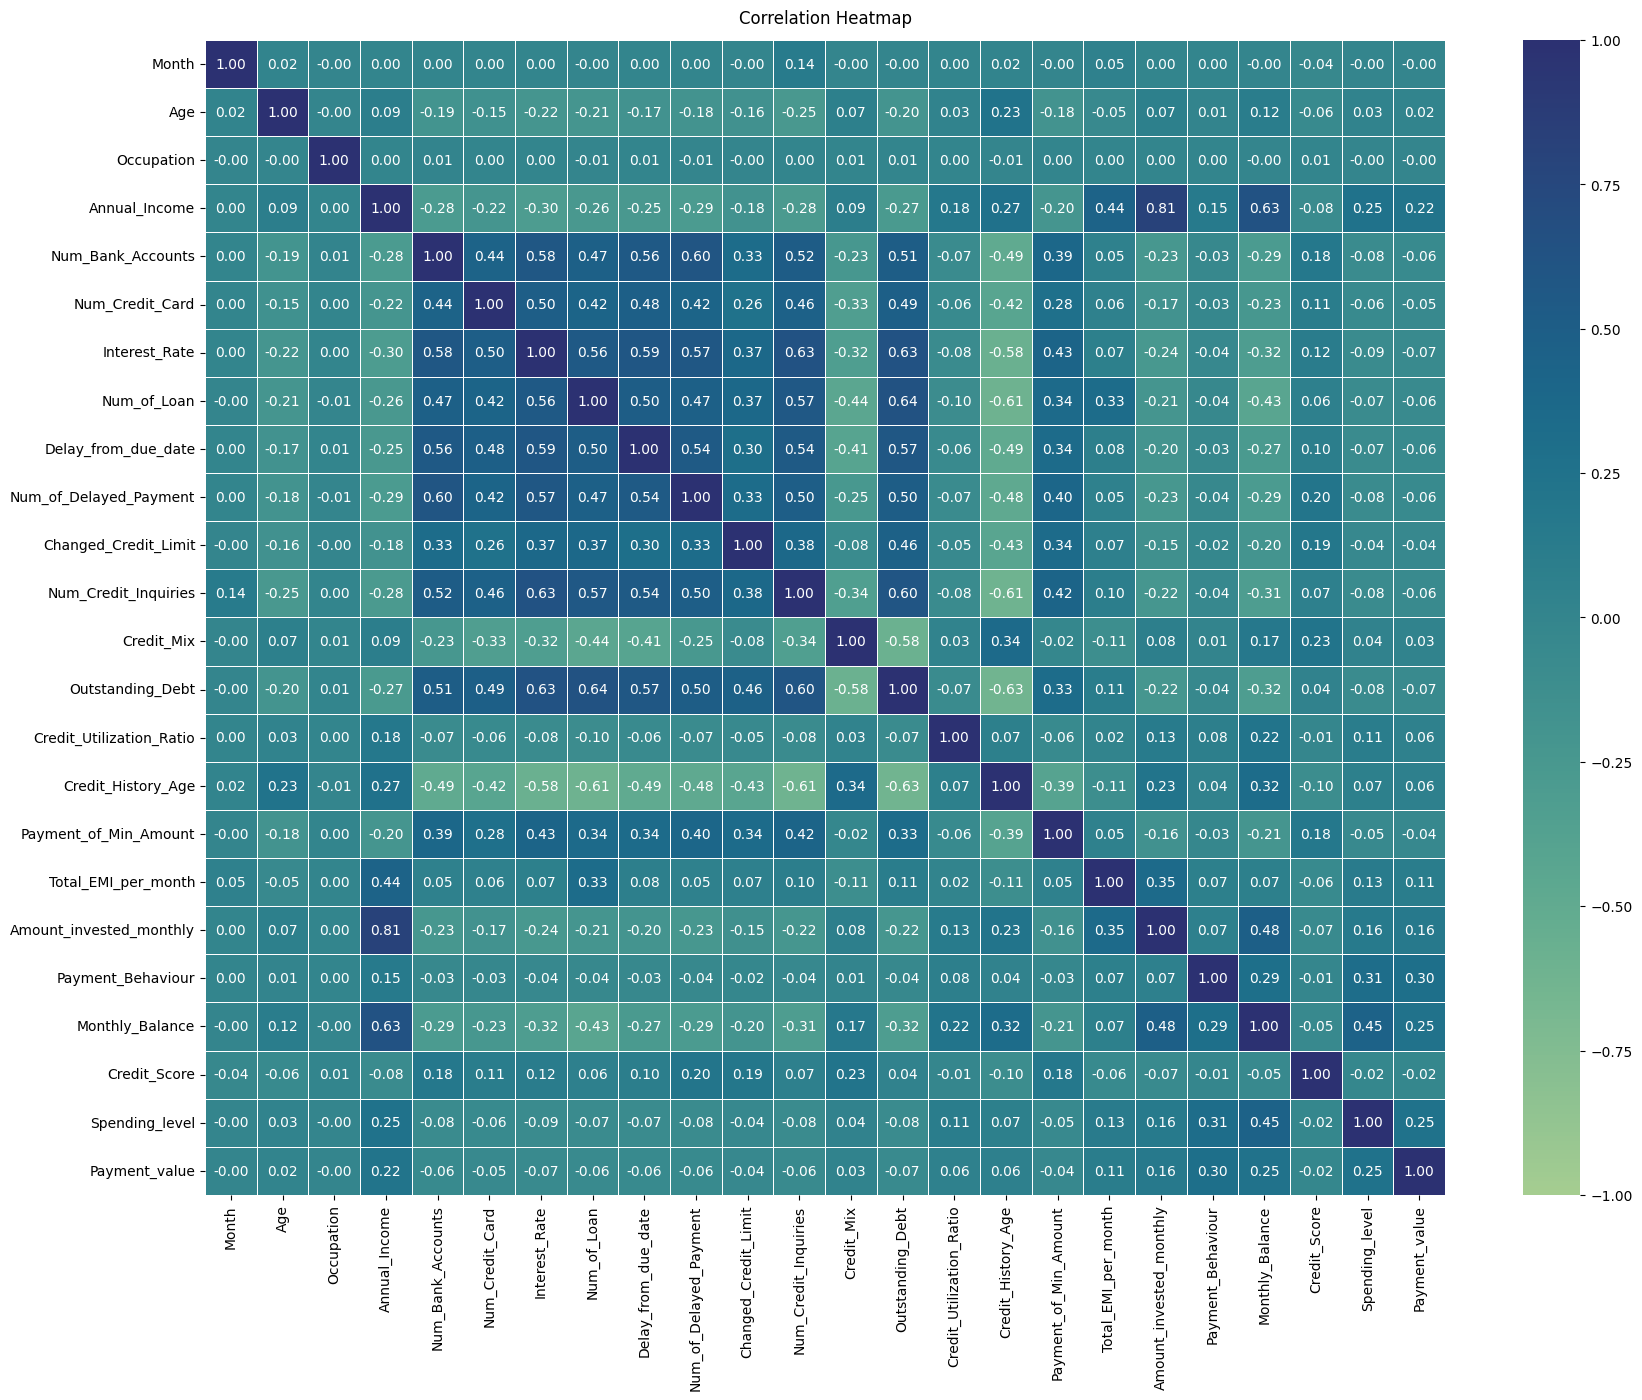

In [ ]:
#Co-relation matrix
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest" )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Drop the original 'Type_of_Loan' column Also, we have 'Not Specified' and 'No Data' columns

In [17]:
#drop the previous existing column 'Type_of_Loan the columns 'Not Specified' and 'No Data'
data.drop(columns=['Type_of_Loan','Not Specified','No Data','Payment_Behaviour'],inplace = True)

In [116]:
pd.set_option('display.max_columns', None) #to view all the columns of the dataset
data.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_level,Payment_value
0,1,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,0,49.574949,21.46538,312.494089,0,1,0
1,2,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,0,49.574949,21.46538,284.629162,0,0,1
2,3,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,0,49.574949,21.46538,331.209863,0,0,2
3,4,23.0,12,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,0,49.574949,21.46538,223.451310,0,0,0
4,5,23.0,12,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,0,49.574949,21.46538,341.489231,0,1,2


In [18]:
#drop the type of loans as these will not be contributing to the Credit score
data.drop(columns=['Auto Loan','Credit-Builder Loan','Debt Consolidation Loan','Home Equity Loan','Mortgage Loan','Payday Loan','Personal Loan','Student Loan'],inplace = True)

In [19]:
data.shape

(99996, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     99996 non-null  int64  
 1   Age                       99996 non-null  float64
 2   Occupation                99996 non-null  int64  
 3   Annual_Income             99996 non-null  float64
 4   Num_Bank_Accounts         99996 non-null  float64
 5   Num_Credit_Card           99996 non-null  float64
 6   Interest_Rate             99996 non-null  float64
 7   Num_of_Loan               99996 non-null  float64
 8   Delay_from_due_date       99996 non-null  float64
 9   Num_of_Delayed_Payment    99996 non-null  float64
 10  Changed_Credit_Limit      99996 non-null  float64
 11  Num_Credit_Inquiries      99996 non-null  float64
 12  Credit_Mix                99996 non-null  int64  
 13  Outstanding_Debt          99996 non-null  float64
 14  Credit

**Split the data into X and Y to have the independent and Dependent Variable**

In [20]:
# y is the dependent variable
y = data['Credit_Score']
#X holds all the independent variables
X = data.drop(['Credit_Score'],axis =1)

In [137]:
X.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spending_level,Payment_value
0,1,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,0,49.574949,21.46538,312.494089,1,0
1,2,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,0,49.574949,21.46538,284.629162,0,1
2,3,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,0,49.574949,21.46538,331.209863,0,2
3,4,23.0,12,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,0,49.574949,21.46538,223.451310,0,0
4,5,23.0,12,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,0,49.574949,21.46538,341.489231,1,2


**Apply Standard Scaling**

In [151]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X_data = sscaler.fit_transform(X)

**Split the data into Train and test**

In [50]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_data,y, test_size=0.20,random_state =42)

In [ ]:
X_train

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Spending_level,Payment_value,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Payday Loan,Personal Loan,Student Loan
92723,1.527524,-0.493856,0.707798,-0.771049,-1.299113,-1.225697,-0.632883,-1.035445,-1.288912,-0.691577,-0.080241,-1.240584,-0.274422,-0.601528,-1.188370,0.700071,1.906410,-0.692159,-0.215698,0.792471,-0.156957,1.078560,1.233989,1.507355,-0.681731,-0.670926,-0.676574,-0.675930,-0.685132,-0.671930,-0.670926
37683,0.654651,0.156433,-0.220394,-0.854661,-0.913498,-2.193246,-1.433671,-0.626664,-0.748540,-1.653568,-0.892699,-0.464953,-0.274422,-0.602108,-1.190216,0.950873,-1.176925,-0.601049,-0.110632,0.143026,-0.488526,-0.927162,-1.088939,-0.663414,-0.681731,1.490477,1.478035,-0.675930,-0.685132,-0.671930,-0.670926
38241,-0.218223,-1.144146,1.635991,0.169006,0.628964,0.709402,0.282303,-0.217884,0.264658,-0.210582,-0.293568,0.569222,0.968383,-1.100984,1.721570,0.720135,0.364742,1.183032,0.911599,-0.506418,0.103637,-0.927162,1.233989,1.507355,-0.681731,1.490477,-0.676574,-0.675930,-0.685132,-0.671930,-0.670926
3806,1.091087,-0.308059,-0.452442,-0.886139,-0.142267,-1.225697,0.396701,-1.035445,-0.478354,-0.851909,-1.045508,-0.206409,0.968383,-0.820801,1.686826,1.312028,-1.176925,-0.750585,-0.803421,0.792471,-0.098468,1.078560,1.233989,-0.663414,-0.681731,-0.670926,-0.676574,-0.675930,1.459573,-0.671930,-0.670926
65306,0.654651,0.528027,-0.220394,0.745619,0.243349,1.193176,0.739896,1.417236,0.129565,1.873732,-0.804948,1.344853,-1.517228,0.125217,-1.525232,-0.624164,1.906410,1.695286,0.157072,1.441915,0.112088,1.078560,0.072525,1.507355,-0.681731,-0.670926,1.478035,1.479442,1.459573,1.488251,-0.670926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-1.091096,1.178317,-1.148587,0.824338,-0.142267,-0.258148,-1.319273,-0.217884,-0.613447,-0.691577,-0.744429,-1.240584,-0.274422,-1.142218,0.556427,0.549589,-1.176925,0.549661,-0.206431,-1.805307,-0.375379,1.078560,-1.088939,1.507355,-0.681731,-0.670926,1.478035,-0.675930,-0.685132,-0.671930,-0.670926
54886,-1.527533,-1.144146,1.171895,-0.754845,-0.142267,0.709402,-0.861680,-1.035445,-0.816087,-1.813900,-0.152863,-0.982040,-0.274422,-0.667269,-0.530171,0.348948,-1.176925,-0.715717,-0.733349,0.143026,-0.503234,-0.927162,-1.088939,1.507355,-0.681731,-0.670926,-0.676574,-0.675930,-0.685132,-0.671930,-0.670926
76820,-1.527533,0.435129,0.243702,-0.775140,1.014579,-0.258148,0.053506,-0.217884,0.062018,-0.050250,1.015141,0.052135,0.968383,0.341954,-0.419921,-1.055544,0.364742,-0.475127,-0.657616,-0.506418,-0.779608,-0.927162,1.233989,1.507355,-0.681731,-0.670926,-0.676574,1.479442,-0.685132,1.488251,-0.670926
860,0.218214,2.014403,-0.916539,-0.812102,-1.684729,0.709402,-1.319273,-0.217884,-0.613447,-0.691577,-0.994068,-0.982040,-0.274422,-0.941133,0.887866,-0.212849,-1.176925,-0.518017,-1.087048,-1.155862,-0.700566,-0.927162,0.072525,-0.663414,1.466855,1.490477,-0.676574,-0.675930,-0.685132,-0.671930,-0.670926


**WEEK 1**



1.   The dataset consists of 100,000 rows and 28 columns
2.   It consists of float, int and object data types.
3.   The dataset had no missing values.
4.   There is skewness shown in some of the features with outliers shown in features like Credit Utilization ratio,Annual Income,Monthly income Salary,Delay from Due date,Num Credit Inquiries,Outstanding Debt,Total EMI per month,Amount invested monthly,Monthly balance
5.   Credit Utilization Ratio shows only 4 values which are outliers,so deleting them would be appropriate. Other features show many values that are outliers ,so there is a probability that these values do form a pattern and need to be part of the dataset.
6.   The EDA of the count plot of Credit Score shows an imbalance in the number of data items for each Credit Score type.
7.   The payment behaviour of most are Low Payment value payments.
8.   53.8% people are having a Low Spending Level.
9.   There is a more or less equal ratio of people with High and Low Spending levels among the differnt categories of Occupation
10.  there is high co-relation between some of the features like Annual Income,Monthly_inhand Salary and Amount invested mothly.
11.  From the Payment Behaviour column ,we can create two more columns, Spending Level and Payment Value for further analysis.
12.  The Type of Loan column contains the differnt type of loan that the partiular person took. We can split these into different colmns for better clarity.
13. The features were mapped to differnt number schemes and encoded for efficient model creation..
14. These values are then scaled using StandardScaling and then the target(Credit_score) feature is assigned to a variable Y and the rest to X
15. The values are then split in ratio 80:20 as the train:test ratio.










**Build and train the credit score classification model.**


In [ ]:
#   ● Feature Engineering: Engineer relevant features from the dataset to aid in credit scoring.
#   ● Model Selection: Choose the most suitable classification algorithm for model development.
#   ● Model Training: Train multiple models and optimize their hyperparameters for improved
#                     performance.
#   ● Model Evaluation: Evaluate model performance using various metrics on the validation
#                       dataset.

**MODEL SELECTION**

**Logistic Regression**

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [52]:
#using class weights to handle class imbalance
from sklearn.utils import class_weight
# As the data is imbalanced, Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.87572688, 1.14976429, 0.62612316])

In [ ]:
# Upsample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

**LOGISTIC REGRESSION**

In [56]:
# Create and train logistic regression model with class weights
#Logistic Regression
model_lr = LogisticRegression(max_iter = 600,
                              class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                            })
#C=10, multi_class='auto',
#fit the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_predictions_LR = model_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_predictions_LR))
print('Accuracy using Logistic Regression =',accuracy_score(y_test,y_predictions_LR))


              precision    recall  f1-score   support

           0       0.49      0.81      0.61      3611
           1       0.61      0.66      0.63      5806
           2       0.79      0.58      0.67     10583

    accuracy                           0.65     20000
   macro avg       0.63      0.69      0.64     20000
weighted avg       0.69      0.65      0.65     20000

Accuracy using Logistic Regression = 0.64665


In [57]:
print('Accuracy Score of Logisistic  Algorithm = ',accuracy_score(y_test,y_predictions_LR))

Accuracy Score of Logisistic  Algorithm =  0.64665


**KNN ALGORITHM**

In [58]:
#KNN model
#predicting with 12 neighbors
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  model_knn = classifier.fit(X_train,y_train)
  y_prediction_knn = model_knn.predict(X_test)
  acc = accuracy_score(y_test,y_prediction_knn)
  print('Neighbor',k,'= :',acc)
  metric_k.append(acc)

Neighbor 3 = : 0.76855
Neighbor 4 = : 0.76955
Neighbor 5 = : 0.76315
Neighbor 6 = : 0.76505
Neighbor 7 = : 0.7601
Neighbor 8 = : 0.7588
Neighbor 9 = : 0.75125
Neighbor 10 = : 0.7494
Neighbor 11 = : 0.741
Neighbor 12 = : 0.74
Neighbor 13 = : 0.73475
Neighbor 14 = : 0.7339


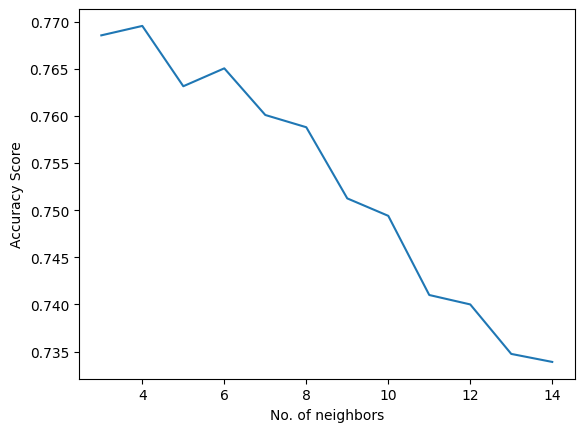

In [59]:
plt.plot(neighbors,metric_k,)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')
plt.show()

In [61]:
classifier =KNeighborsClassifier(n_neighbors= 4,metric='euclidean')
classifier.fit(X_train,y_train)
y_predictions_KNN=classifier.predict(X_test)
acc=accuracy_score(y_test,y_predictions_KNN)
metric_k.append(acc)

In [62]:
print(classification_report(y_test, y_predictions_KNN))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      3611
           1       0.74      0.84      0.79      5806
           2       0.84      0.74      0.79     10583

    accuracy                           0.77     20000
   macro avg       0.75      0.78      0.76     20000
weighted avg       0.78      0.77      0.77     20000



In [63]:
print('Accuracy Score of KNN Algorithm ',accuracy_score(y_test,y_predictions_KNN))

Accuracy Score of KNN Algorithm  0.76955


**SVM -LINEAR AND RBF**

In [65]:
from sklearn.svm import SVC

In [68]:
svm_cls = SVC(class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                           },kernel='linear')
svm = svm_cls.fit(X_train,y_train)
y_prediction_svm = svm.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_prediction_svm))

Accuracy Score 0.65845


In [69]:
# Print classification report
print(classification_report(y_test, y_prediction_svm))


              precision    recall  f1-score   support

           0       0.49      0.83      0.62      3611
           1       0.63      0.68      0.65      5806
           2       0.82      0.59      0.68     10583

    accuracy                           0.66     20000
   macro avg       0.65      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000



In [70]:
svm_cls1=SVC(class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                           },kernel='rbf')
svm_cls1=svm_cls1.fit(X_train,y_train)
y_prediction_RBF=svm_cls1.predict(X_test)

In [73]:
print('Accuracy Score of SVM(kernel = rbf) Algorithm',accuracy_score(y_test,y_prediction_RBF))

Accuracy Score of SVM(kernel = rbf) Algorithm 0.69905


In [74]:
# Print classification report
print(classification_report(y_test, y_prediction_RBF))

              precision    recall  f1-score   support

           0       0.52      0.85      0.65      3611
           1       0.67      0.77      0.72      5806
           2       0.86      0.61      0.71     10583

    accuracy                           0.70     20000
   macro avg       0.69      0.74      0.69     20000
weighted avg       0.74      0.70      0.70     20000



**DECISION TREE CLASSIFIER**

In [76]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#dt_cls=DecisionTreeClassifier()
#model=dt_cls.fit(X_train_resampled,y_train_resampled)
#y_prediction_DT=model.predict(X_test)

In [78]:
# Create a DecisionTreeClassifier with class weights
dt_classifier = DecisionTreeClassifier(class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                           })
dt = dt_classifier.fit(X_train,y_train)
y_prediction_DT = dt.predict(X_test)
print('Accuracy of Decision Tree Classifier with class weights',accuracy_score(y_test,y_prediction_DT))

Accuracy of Decision Tree Classifier with class weights 0.7385


In [79]:
print(classification_report(y_test, y_prediction_DT))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      3611
           1       0.72      0.72      0.72      5806
           2       0.76      0.78      0.77     10583

    accuracy                           0.74     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.74      0.74      0.74     20000



In [88]:
#accuracy_score('Accuracy Score of Decision Tree Algorithm', accuracy_score(y_test,y_prediction_DT))
print('Accuracy Score of Decision Tree  Algorithm  = ',accuracy_score(y_test,y_prediction_DT))

Accuracy Score of Decision Tree  Algorithm  =  0.7385


**RANDOM FOREST CLASSIFIER**

In [81]:
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
#with class weights
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier( random_state=42,class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2]})
model_rf = rf_cls.fit(X_train,y_train)
y_prediction_rf = model_rf.predict(X_test)

In [96]:
print(" Accuracy Score of Random Forest Model with class weights =",accuracy_score(y_test,y_prediction_rf))

 Accuracy Score of Random Forest Model with class weights = 0.8297


In [97]:
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3611
           1       0.81      0.85      0.83      5806
           2       0.84      0.84      0.84     10583

    accuracy                           0.83     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



In [86]:
print('Accuracy Score of Random Forest Classifier',accuracy_score(y_test,y_prediction_rf))

Accuracy Score of Random Forest Classifier 0.8297


In [93]:
print('ACCURACY SCORES OF THE BELOW ALGORITHM')
print('Random Forest Classifier: {:.2%}'.format(accuracy_score(y_test,y_prediction_rf)))
print('Decision Tree Classifier: {:.2%}'.format(accuracy_score(y_test,y_prediction_DT)))
print('SVM(kernel = rbf) Algorithm: {:.2%}'.format(accuracy_score(y_test,y_prediction_RBF)))
print('SVM(kernel = linear) Algorithm: {:.2%}'.format(accuracy_score(y_test,y_prediction_svm)))
print('KNN Algorithm: {:.2%} '.format(accuracy_score(y_test,y_predictions_KNN)))
print('Logistic Regression: {:.2%}'.format(accuracy_score(y_test,y_predictions_LR)))


ACCURACY SCORES OF THE BELOW ALGORITHM
Random Forest Classifier: 82.97%
Decision Tree Classifier: 73.85%
SVM(kernel = rbf) Algorithm: 69.91%
SVM(kernel = linear) Algorithm: 65.84%
KNN Algorithm: 76.95% 
Logistic Regression: 64.66%


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.8196535330333147
